LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.688722 (0.060632)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


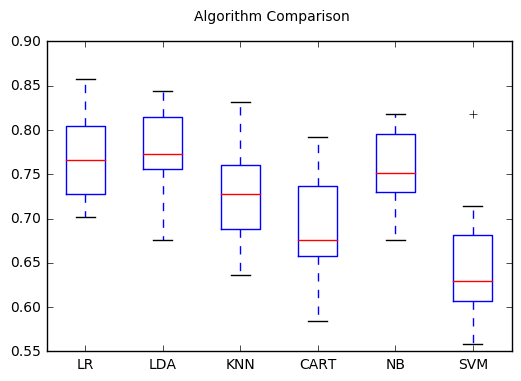

In [1]:
# Compare Algorithms

import pandas
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
num_folds = 10
num_instances = len(X)
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
	cv_results = cross_validation.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [10]:
# Sample pipeline for text feature extraction and evaluation
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s %(message)s')

# Load some categories from the training set
categories = ['alt.atheism', 'talk.religion.misc',]
# Uncomment the following to do the analysis on all the categories
#categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

data = fetch_20newsgroups(subset='train', categories=categories)
print("%d documents" % len(data.filenames))
print("%d categories \n" % len(data.target_names))

# define a pipeline combining a text feature extractor with a simple classifier
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    'clf__n_iter': (10, 50, 80),
}

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected block

    # find the best parameters for both the feature extraction and the classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:", parameters)
    t0 = time()
    grid_search.fit(data.data, data.target)
    print("done in %0.3fs\n" % (time() - t0))

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc']
857 documents
2 categories 

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters: {'vect__max_features': (None, 5000, 10000, 50000), 'vect__ngram_range': ((1, 1), (1, 2)), 'clf__n_iter': (10, 50, 80), 'tfidf__norm': ('l1', 'l2'), 'tfidf__use_idf': (True, False), 'clf__penalty': ('l2', 'elasticnet'), 'clf__alpha': (1e-05, 1e-06), 'vect__max_df': (0.5, 0.75, 1.0)}
Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed:  8.0min finished


done in 482.286s

Best score: 0.947
Best parameters set:
	clf__alpha: 1e-05
	clf__n_iter: 50
	clf__penalty: 'elasticnet'
	tfidf__norm: 'l2'
	tfidf__use_idf: True
	vect__max_df: 0.5
	vect__max_features: None
	vect__ngram_range: (1, 2)


### Part 1: Model building in scikit-learn (refresher)

In [ ]:
# using pipeline for two classification steps

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

iris = load_iris()
X, y = iris.data, iris.target

# This dataset is way to high-dimensional. Better do PCA:
pca = PCA(n_components=2)

# Maybe some original features where good, too?
selection = SelectKBest(k=1)

# Build estimator from PCA and Univariate selection:
combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# Use combined features to transform dataset:
X_features = combined_features.fit(X, y).transform(X)

svm = SVC(kernel="linear")

# Do grid search over k, n_components and C:

pipeline = Pipeline([("features", combined_features), ("svm", svm)])

param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[1, 2],
                  svm__C=[0.1, 1, 10])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
grid_search.fit(X, y)
print(grid_search.best_estimator_)

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [37]:
# examine the first 5 rows of the feature matrix (including the feature names)
import pandas as pd
pd.DataFrame(X, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
# import the class
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model (with the default parameters)
knn = KNeighborsClassifier()

# fit the model with data (occurs in-place)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
# predict the response for a new observation
knn.predict([[3, 5, 4, 2]])

array([1])

### Part 2: Create a Document Term matrix from a dataset

In [8]:
import pandas as pd
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

# learn the 'vocabulary' of the training data (occurs in-place)
vect.fit(simple_train)

# examine the fitted vocabulary
vect.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [9]:
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(simple_train)
print(simple_train_dtm)
# convert sparse matrix to a dense matrix
simple_train_dtm.toarray()

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [10]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [11]:
# example text for model testing
simple_test = ["please don't call me"]

# transform testing data into a document-term matrix (using existing vocabulary)
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


### Part 3: Spam/ham classifier

In [145]:
# read file into pandas using a relative path
path = 'sms.txt'
sms = pd.read_table(path, header=None, names=['label', 'message'])

# alternative: read file into pandas from a URL
# url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
# sms = pd.read_table(url, header=None, names=['label', 'message'])

In [146]:
# examine the shape
print('shape ' + str(sms.shape))

# examine the first 10 rows
print(sms.head(10))

# examine the class distribution
print(sms.label.value_counts())

# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})

# check that the conversion worked
print( sms.head(10))

# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = sms.message
y = sms.label_num
print(X.shape)
print(y.shape)
print()

# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

shape (5572, 2)
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...
ham     4825
spam     747
Name: label, dtype: int64
  label                                            message  label_num
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3  

In [147]:
# instantiate the vectorizer
vect = CountVectorizer()
# learn training data vocabulary, then use it to create a document-term matrix
#vect.fit(X_train)
#X_train_dtm = vect.transform(X_train)

# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

# examine the document-term matrix
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [148]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

In [157]:
#Part 5: Building and evaluating a model

# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy of class predictions
from sklearn import metrics
print('naive bayes accuracy=%s' % metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

# calculate predicted probabilities for X_test_dtm (naive bayes probabilities are poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

# calculate AUC (Area Under Curve)
print('naive bayes AUC=%s' % metrics.roc_auc_score(y_test, y_pred_prob))

Wall time: 3.01 ms
naive bayes accuracy=0.988513998564
naive bayes AUC=0.986643100054


In [151]:
# print false positives
print(X_test[(y_pred_class==1) & (y_test==0)])

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object


In [152]:
for aa,bb in nb.predict_proba(X_test_dtm)[:25]:
    print('%6.2f %6.2f' %(aa*100,bb*100))

 99.71   0.29
100.00   0.00
 99.79   0.21
 98.00   2.00
100.00   0.00
100.00   0.00
 99.81   0.19
 99.90   0.10
100.00   0.00
100.00   0.00
100.00   0.00
 99.12   0.88
 99.95   0.05
 99.98   0.02
100.00   0.00
100.00   0.00
  0.00 100.00
100.00   0.00
  0.00 100.00
 99.98   0.02
 99.99   0.01
 99.97   0.03
100.00   0.00
100.00   0.00
 99.99   0.01


### Part 4: Logistic regression (compared to Naive Bayes)

In [167]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

# calculate accuracy
print('logistic regression accuracy=%s' % metrics.accuracy_score(y_test, y_pred_class))

# calculate AUC
print('logistic regression AUC=%s' % metrics.roc_auc_score(y_test, y_pred_prob))

Wall time: 30 ms
logistic regression accuracy=0.987796123475
logistic regression AUC=0.993681761231


In [168]:
for aa,bb in logreg.predict_proba(X_test_dtm)[:25]:
    print('%6.2f %6.2f' %(aa*100,bb*100))

 98.73   1.27
 99.65   0.35
 99.38   0.62
 98.95   1.05
 98.88   1.12
 99.93   0.07
 99.05   0.95
 99.55   0.45
 99.42   0.58
 99.90   0.10
 99.77   0.23
 99.34   0.66
 99.34   0.66
 98.04   1.96
 99.47   0.53
 99.74   0.26
  0.11  99.89
 98.09   1.91
  4.02  95.98
 97.39   2.61
 99.15   0.85
 99.42   0.58
 99.24   0.76
 99.27   0.73
 99.41   0.59


In [169]:
# store the vocabulary of X_train
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

# examine the first 50 tokens
print(X_train_tokens[0:50])

# examine the last 50 tokens
print(X_train_tokens[-50:])

# Naive Bayes counts the number of times each token appears in each class
nb.feature_count_

# rows represent classes, columns represent tokens
nb.feature_count_.shape

# number of times each token appears across all HAM messages
ham_token_count = nb.feature_count_[0, :]
ham_token_count

# number of times each token appears across all SPAM messages
spam_token_count = nb.feature_count_[1, :]
spam_token_count

# create a DataFrame of tokens with their separate ham and spam counts
tokens = pd.DataFrame({'token':X_train_tokens, 'ham':ham_token_count, 'spam':spam_token_count}).set_index('token')
tokens.head()

# examine 5 random DataFrame rows
tokens.sample(5, random_state=6)

# Naive Bayes counts the number of observations in each class
nb.class_count_

['00', '000', '008704050406', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07090201529', '07090298926', '07123456789', '07732584351', '07734396839', '07742676969', '0776xxxxxxx', '07781482378', '07786200117', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705']
['yer', 'yes', 'yest', 'yesterday', 'yet', 'yetunde', 'yijue', 'ym', 'ymca', 'yo', 'yoga', 'yogasana', 'yor', 'yorge', 'you', 'youdoing', 'youi', 'youphone', 'your', 'youre', 'yourjob', 'yours', 'yourself', 'youwanna', 'yowifes', 'yoyyooo', 'yr', 'yrs', 'ything', 'yummmm', 'yummy', 'yun', 'yunny', 'yuo', 'yuou', 'yup', 'zac', 'zaher', 'zealand', 'zebra', 'zed', 'zeros', 'zhong', 'zindgi', 

array([ 3617.,   562.])

In [178]:
# add 1 to ham and spam counts to avoid dividing by 0
tokens['ham'] = tokens.ham + 1
tokens['spam'] = tokens.spam + 1
tokens.sample(5, random_state=6)

# convert the ham and spam counts into frequencies
tokens['ham'] = tokens.ham / nb.class_count_[0]
tokens['spam'] = tokens.spam / nb.class_count_[1]
tokens.sample(5, random_state=6)

# calculate the ratio of spam-to-ham for each token
tokens['spam_ratio'] = tokens.spam / tokens.ham
tokens.sample(5, random_state=6)

# examine the DataFrame sorted by spam_ratio
# note: use sort() instead of sort_values() for pandas 0.16.2 and earlier
tokens.sort_values('spam_ratio', ascending=False)

# look up the spam_ratio for a given token
tokens.loc['dating', 'spam_ratio']

83.667259786476862

### Tuning the vectorizer

In [185]:
#show default parameters for CountVectorizer
vect
#However, the vectorizer is worth tuning, just like a model is worth tuning! Here are a few parameters that you might want to tune:

#stop_words: string {'english'}, list, or None (default)
#If 'english', a built-in stop word list for English is used.
#If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
#If None, no stop words will be used.
# remove English stop words
vect = CountVectorizer(stop_words='english')


#ngram_range: tuple (min_n, max_n), default=(1, 1)
#The lower and upper boundary of the range of n-values for different n-grams to be extracted.
#All values of n such that min_n <= n <= max_n will be used.
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))


#max_df: float in range [0.0, 1.0] or int, default=1.0
#When building the vocabulary, ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).
#If float, the parameter represents a proportion of documents.
#If integer, the parameter represents an absolute count.
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)


#min_df: float in range [0.0, 1.0] or int, default=1
#When building the vocabulary, ignore terms that have a document frequency strictly lower than the given threshold. (This value is also called "cut-off" in the literature.)
#If float, the parameter represents a proportion of documents.
#If integer, the parameter represents an absolute count.
# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)


#Guidelines for tuning CountVectorizer:
#Use your knowledge of the problem and the text, and your understanding of the tuning parameters, to help you decide what parameters to tune and how to tune them.
#Experiment, and let the data tell you the best approach!

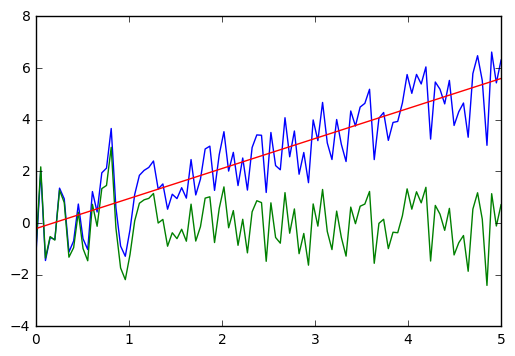